In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_booking = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns',None)
df_booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## 1. Problem Framing

The business objective to be achieved is to get a prediction system that can be used to find out which customers will cancel orders and the factors that occur.

The output to be generated is a prediction of the booking status of a customer. If you can predict which customer will cancel the room, you can help the marketing team to prepare a marketing strategy in an effort to avoid income loss that can harm the hotel.

The machine learning approach that will be used is supervised learning in the form of classification problems. The system that you want to work on will predict customers who have the possibility of canceling room orders.

The performance measure that will be used to help determine the quality of the final result is accuracy to determine the percentage of prediction success. Recall and precision will also be used to find out where the prediction error is.

The risk that most likely will occur when this system is used is the occurrence of income loss for hotels because there is a possibility for this system to make prediction errors in predicting customers and not precisely determining the factors that influence this so it will be difficult to determine the right marketing strategy for such cases like this.

## 2. EDA

In [4]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df_booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']

for n in columns:
    cols = df_booking[n].unique()
    ncols = df_booking[n].nunique()
    print(n)
    print(ncols)
    print(cols)
   

hotel
2
['Resort Hotel' 'City Hotel']
is_canceled
2
[0 1]
lead_time
479
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

required_car_parking_spaces
5
[0 1 2 8 3]
total_of_special_requests
6
[0 1 3 2 4 5]
reservation_status
3
['Check-Out' 'Canceled' 'No-Show']
reservation_status_date
926
['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-15' '2015-07-16' '2015-05-29' '2015-05-19'
 '2015-06-19' '2015-05-23' '2015-05-18' '2015-07-09' '2015-06-02'
 '2015-07-13' '2015-07-04' '2015-06-29' '2015-06-16' '2015-06-18'
 '2015-06-12' '2015-06-09' '2015-05-26' '2015-07-11' '2015-07-12'
 '2015-07-17' '2015-04-15' '2015-05-13' '2015-07-10' '2015-05-20'
 '2015-05-12' '2015-07-14' '2015-06-17' '2015-05-01' '2015-03-30'
 '2015-07-19' '2015-06-03' '2015-06-26' '2015-05-14' '2015-07-20'
 '2015-05-07' '2015-05-28' '2015-04-13' '2015-03-25' '2015-07-21'
 '2015-06-27' '2015-07-18' '2015-07-23' '2015-06-08' '2015-06-22'
 '2015-06-24' '2015-03-05' '2015-06-01' '2015-04-24' '2015-07-22'
 '2015-05-27' '2015-04-06' '2015-04-11' 

In [7]:
df_booking.replace({'arrival_date_month':{
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}},inplace=True)

df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
from sklearn.model_selection import train_test_split

used_cols = ['hotel','lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

label =  'is_canceled'

x = df_booking[used_cols]
y = df_booking[label]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=16)

In [9]:
x_train.count()

hotel                             95512
lead_time                         95512
arrival_date_year                 95512
arrival_date_month                95512
arrival_date_week_number          95512
arrival_date_day_of_month         95512
stays_in_weekend_nights           95512
stays_in_week_nights              95512
adults                            95512
children                          95509
babies                            95512
meal                              95512
market_segment                    95512
distribution_channel              95512
is_repeated_guest                 95512
previous_cancellations            95512
previous_bookings_not_canceled    95512
reserved_room_type                95512
assigned_room_type                95512
booking_changes                   95512
deposit_type                      95512
days_in_waiting_list              95512
customer_type                     95512
adr                               95512
required_car_parking_spaces       95512


In [10]:
df_train_set = pd.concat([x_train,y_train],axis=1)
df_test_set = pd.concat([x_test,y_test],axis=1)
df_train_set

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
94530,City Hotel,85,2016,8,32,5,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,126.90,0,1,0
14070,Resort Hotel,267,2016,7,27,2,2,5,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.80,0,0,0
22375,Resort Hotel,35,2016,3,13,23,0,3,2,0.0,0,BB,Direct,Direct,0,0,0,D,D,1,No Deposit,0,Transient,86.33,1,0,0
98747,City Hotel,166,2016,10,40,1,2,1,2,0.0,0,BB,Direct,Direct,0,0,0,D,D,0,No Deposit,0,Transient,118.80,0,1,0
59067,City Hotel,263,2016,10,43,21,0,2,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,110.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50497,City Hotel,437,2016,5,19,2,1,2,2,0.0,0,BB,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,60.00,0,0,1
98885,City Hotel,19,2016,10,41,2,2,2,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,85.00,0,0,0
2169,Resort Hotel,163,2015,10,40,3,2,5,2,0.0,0,BB,Direct,Direct,0,0,0,D,D,1,No Deposit,0,Transient,51.30,0,1,0
113902,City Hotel,17,2017,6,24,11,2,1,2,0.0,0,SC,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,109.00,0,1,0


<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

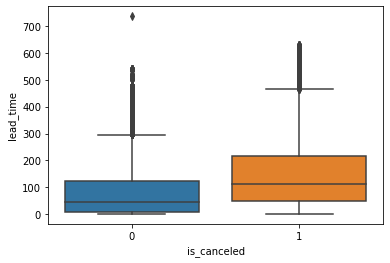

In [11]:
sns.boxplot(data=df_train_set,x='is_canceled',y='lead_time')

<AxesSubplot:xlabel='is_canceled', ylabel='adr'>

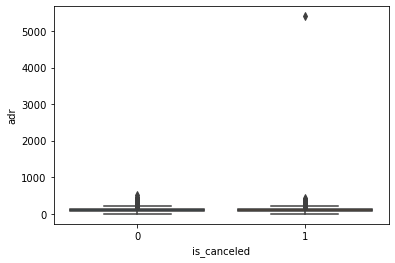

In [12]:
sns.boxplot(data=df_train_set,x='is_canceled',y='adr')

<AxesSubplot:ylabel='adr'>

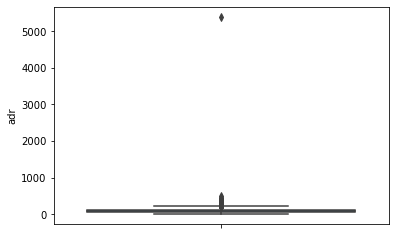

In [13]:
sns.boxplot(data=df_train_set,y='adr')

<AxesSubplot:ylabel='lead_time'>

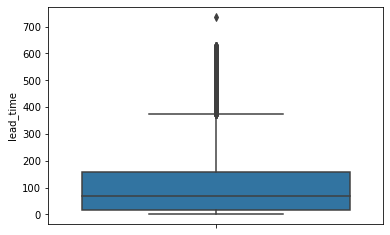

In [14]:
sns.boxplot(data=df_train_set,y='lead_time')

In [15]:
df_train_set

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
94530,City Hotel,85,2016,8,32,5,0,1,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,126.90,0,1,0
14070,Resort Hotel,267,2016,7,27,2,2,5,2,0.0,0,HB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,90.80,0,0,0
22375,Resort Hotel,35,2016,3,13,23,0,3,2,0.0,0,BB,Direct,Direct,0,0,0,D,D,1,No Deposit,0,Transient,86.33,1,0,0
98747,City Hotel,166,2016,10,40,1,2,1,2,0.0,0,BB,Direct,Direct,0,0,0,D,D,0,No Deposit,0,Transient,118.80,0,1,0
59067,City Hotel,263,2016,10,43,21,0,2,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,110.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50497,City Hotel,437,2016,5,19,2,1,2,2,0.0,0,BB,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,60.00,0,0,1
98885,City Hotel,19,2016,10,41,2,2,2,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,85.00,0,0,0
2169,Resort Hotel,163,2015,10,40,3,2,5,2,0.0,0,BB,Direct,Direct,0,0,0,D,D,1,No Deposit,0,Transient,51.30,0,1,0
113902,City Hotel,17,2017,6,24,11,2,1,2,0.0,0,SC,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,109.00,0,1,0


In [16]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 94530 to 105129
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   lead_time                       95512 non-null  int64  
 2   arrival_date_year               95512 non-null  int64  
 3   arrival_date_month              95512 non-null  int64  
 4   arrival_date_week_number        95512 non-null  int64  
 5   arrival_date_day_of_month       95512 non-null  int64  
 6   stays_in_weekend_nights         95512 non-null  int64  
 7   stays_in_week_nights            95512 non-null  int64  
 8   adults                          95512 non-null  int64  
 9   children                        95509 non-null  float64
 10  babies                          95512 non-null  int64  
 11  meal                            95512 non-null  object 
 12  market_segment             

## 3. Data Prepation

In [17]:
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

num_cols = ['adr','lead_time']
ctg_cols = ['hotel','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type']
do_nothing = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']
impute = ['children']

class DoNothingTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        return
    def fit(self,x,y=None):
        return self
    def transform(self,x):
        return x.values
    
column_transformer = ColumnTransformer([
    ('robust',RobustScaler(),num_cols),
    ('encoder',OneHotEncoder(drop='first'),ctg_cols),
    ('skip',DoNothingTransformer(),do_nothing),
    ('impute',SimpleImputer(missing_values=np.nan,strategy='most_frequent'),impute)
])

full_pipeline = Pipeline([
    ('col_transformer',column_transformer),
    ('log_reg',LogisticRegression(max_iter=1000))
])

full_pipeline_knn = Pipeline([
    ('col_transformer',column_transformer),
    ('knn',KNeighborsClassifier())
])

full_pipeline_dt = Pipeline([
    ('col_transformer',column_transformer),
    ('dt',DecisionTreeClassifier())
])

## 4. Model Training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
full_pipeline.fit(x_train,y_train)

print('Train set:{}'.format(full_pipeline.score(x_train,y_train)))
print('Test set:{}'.format(full_pipeline.score(x_test,y_test)))

Train set:0.8113640170868582
Test set:0.8074378088617137


In [19]:
# full_pipeline_knn.fit(x_train,y_train)
# print('Train set:{}'.format(full_pipeline_knn.score(x_train,y_train)))
# print('Test set:{}'.format(full_pipeline_knn.score(x_test,y_test)))

In [20]:
# full_pipeline_dt.fit(x_train,y_train)
# print('Train set:{}'.format(full_pipeline_dt.score(x_train,y_train)))
# print('Train set:{}'.format(full_pipeline_dt.score(x_test,y_test)))

## 5. Evaluation

In [21]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(full_pipeline,x_train,y_train,cv=5,
                           scoring=('accuracy','recall','precision'),
                          return_train_score=True)
df_cv = pd.DataFrame(data=cv_scores)
df_cv

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision
0,8.388831,0.030230,NaN,0.811305,NaN,0.599243,NaN,0.845989
1,7.869479,0.060364,0.811286,0.809433,0.600990,0.599774,0.844228,0.839487
2,8.850388,0.090426,0.811643,0.811622,0.608007,0.606011,0.838634,0.840510
3,9.601251,0.022168,NaN,0.813493,NaN,0.613600,NaN,0.839234
4,8.933115,0.080752,0.810229,0.808664,0.606365,0.602072,0.835835,0.834894


In [22]:
y_pred = full_pipeline.predict(x_train)

confusion_matrix(y_train,y_pred)

array([[56107,  4056],
       [13961, 21388]], dtype=int64)

In [23]:
log_reg_coef = full_pipeline.named_steps.log_reg.coef_
feature_name = num_cols + full_pipeline['col_transformer'].transformers_[1][1].get_feature_names().tolist() + do_nothing + impute

df_result_coef = pd.DataFrame({
    'name':feature_name,
    'coef':log_reg_coef.flatten()
})
df_coef = df_result_coef.sort_values('coef')
df_coef

# log_reg_coef

,name,coef
56,required_car_parking_spaces,-3.205371
29,x5_D,-1.002009
57,total_of_special_requests,-0.750828
53,previous_bookings_not_canceled,-0.638104
31,x5_F,-0.635006
11,x2_Offline TA/TO,-0.578716
30,x5_E,-0.531153
28,x5_C,-0.497671
32,x5_G,-0.424059
51,is_repeated_guest,-0.375388


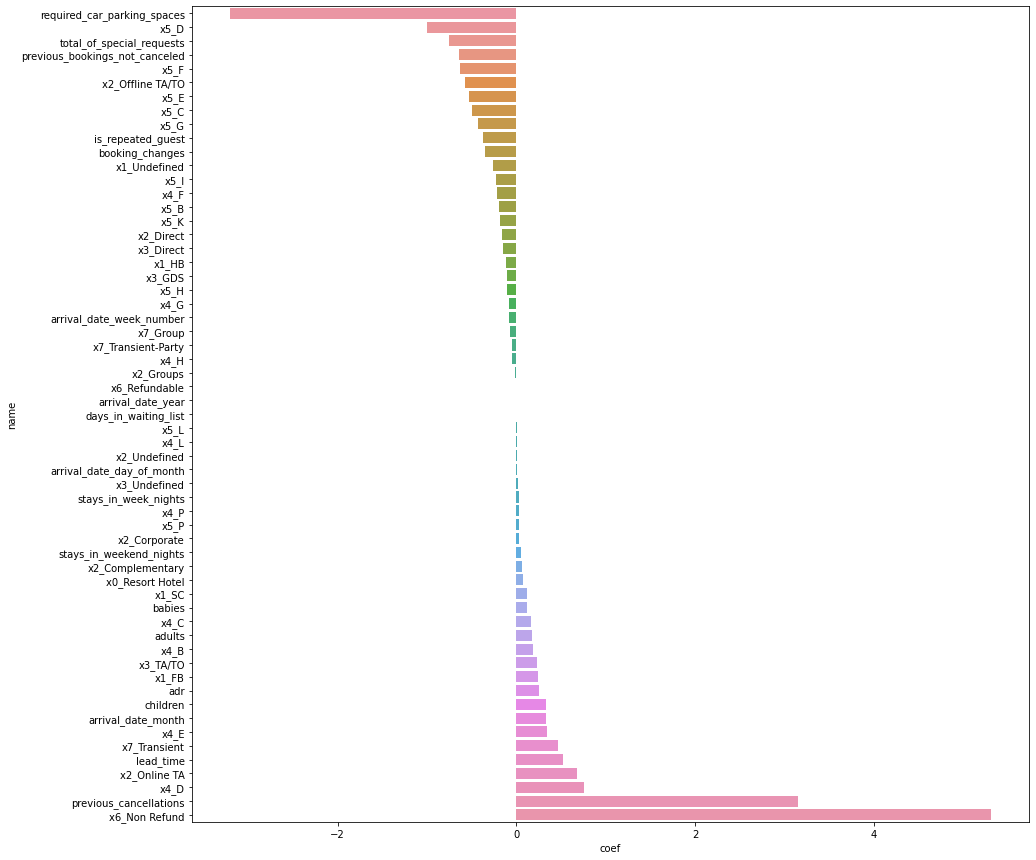

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(data=df_coef,x='coef',y='name');

Based on the model above, there are several factors that quite influence the cancellation of the room.

## 6. Result

So far, based on the model used, namely Logistic Regression, I got an accuracy of 81% on the train set and 80% on the test. So far these results can be considered quite good and can predict the results quite reliably. According to this model, non-refund features and special requests are the most influential features in each customer's decision making. Both of these features can be used by hotel marketing to take the right steps in the future in making decisions about room cancellations by customers.

The recommendation that I can suggest is for the marketing team or business team, namely strengthening service to customers in fulfilling special requests requested by customers by considering requests that may be fulfilled because based on the existing model special requests are the strongest factor for customers not to cancel their room orders even though have the possibility of spending more money to meet the special requests of some customers.

One of the interesting things I found was that non-refunds were one of the factors that were considered by customers in canceling rooms, although normally rooms that cannot be refunded should be a strong incentive for customers not to cancel rooms.